Recamán's sequence (or Recaman's sequence): $a(0) = 0;\ for\ n > 0,\ a(n) = a(n-1) - n$ if positive and not already in the sequence, otherwise $a(n) = a(n-1) + n$

$$ a(n) = a(n-1)-n $$
$$ a(n) = a(n - 1) + n$$

In [1]:
% matplotlib inline
from itertools import chain, repeat

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import patches
import seaborn as sns
sns.set(style='whitegrid')

import numba

In [2]:
@numba.jit
def recaman_np(n):
    sequence = np.zeros(n, dtype=int)
    idx = 0

    for i in range(1, n):
        idx -= i 
        if (idx > 0) and (idx not in sequence):
            sequence[i] = idx
        else:
            idx += i*2
            sequence[i] = idx
    return sequence

In [3]:
# implementation from the wild
@numba.jit
def recaman(n):
 
    # Create an array to store terms
    arr = [0] * n
 
    # First term of the sequence
    # is always 0
    arr[0] = 0
 
    # Fill remaining terms using
    # recursive formula.
    for i in range(1, n):
     
        curr = arr[i-1] - i
        for j in range(0, i):
         
            # If arr[i-1] - i is
            # negative or already
            # exists.
            if ((arr[j] == curr) or curr < 0):
                curr = arr[i-1] + i
                break
             
        arr[i] = curr
    return arr

In [4]:
n = 1000

depending on the platform the jited version of numpy is faster

In [7]:
%timeit recaman_np(n)

2.56 ms ± 159 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
%timeit recaman(n)

187 µs ± 5.34 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# Draw circles

In [9]:
def draw_recaman(n, figsize=(10,10), dpi=600):
    
    def arc_patch(xy, width, height, theta1=0., theta2=180., resolution=50, **kwargs):
        """ creates semicercles. Function found on stackoverflow <-Thanks"""
        # generate the points
        theta = np.linspace(np.radians(theta1), np.radians(theta2), resolution)
        points = np.vstack((width*np.cos(theta)  + xy[0], 
                            height*np.sin(theta) + xy[1]))
        # build the polygon and add it to the axes
        poly = patches.Polygon(points.T, closed=True, **kwargs)

        return poly

    def ncycles(iterable, n):
        "Returns the sequence elements n times"
        return chain.from_iterable(repeat(iterable, n))

    R = (0, 180)

    seq = recaman(n)
    seq_tups = (sorted((a,b)) for a, b in zip(seq,seq[1:]))
    arcs = []
    right_limits = []
    # Make arcs
    for i, (x, r) in enumerate(zip(seq_tups, ncycles(R, n))):

        x0 = x[0]  # start x of semicircle
        radio = abs((x[1] - x[0])/2)
        center = x0 + radio # center of the circle
        a = arc_patch(xy=(center,0), width=radio, height=radio, theta1=r, theta2=r+180)
        arcs.append(a)
        right_limits.append(x[1])

    # Draw arcs
    fig, ax = plt.subplots(1,1, figsize=figsize,dpi=dpi, subplot_kw={'aspect':'equal'})
    palette = sns.color_palette('viridis', n*2)
    for c, a in enumerate(arcs):
        ax.add_artist(a)
        a.set_clip_box(ax.bbox)
#         a.set_alpha(1)
        a.set_facecolor('none')
#         a.set_facecolor(palette[c])
        a.set_edgecolor('black')
        a.set_linewidth(1)

    ax.set_xlim(-1, max(right_limits))
    ax.set_ylim(-radio-1, radio+1)
    ax.axis('off')
#     plt.savefig('recamans.pdf')
#     plt.savefig('recamans.png', dpi=600)
    plt.show()

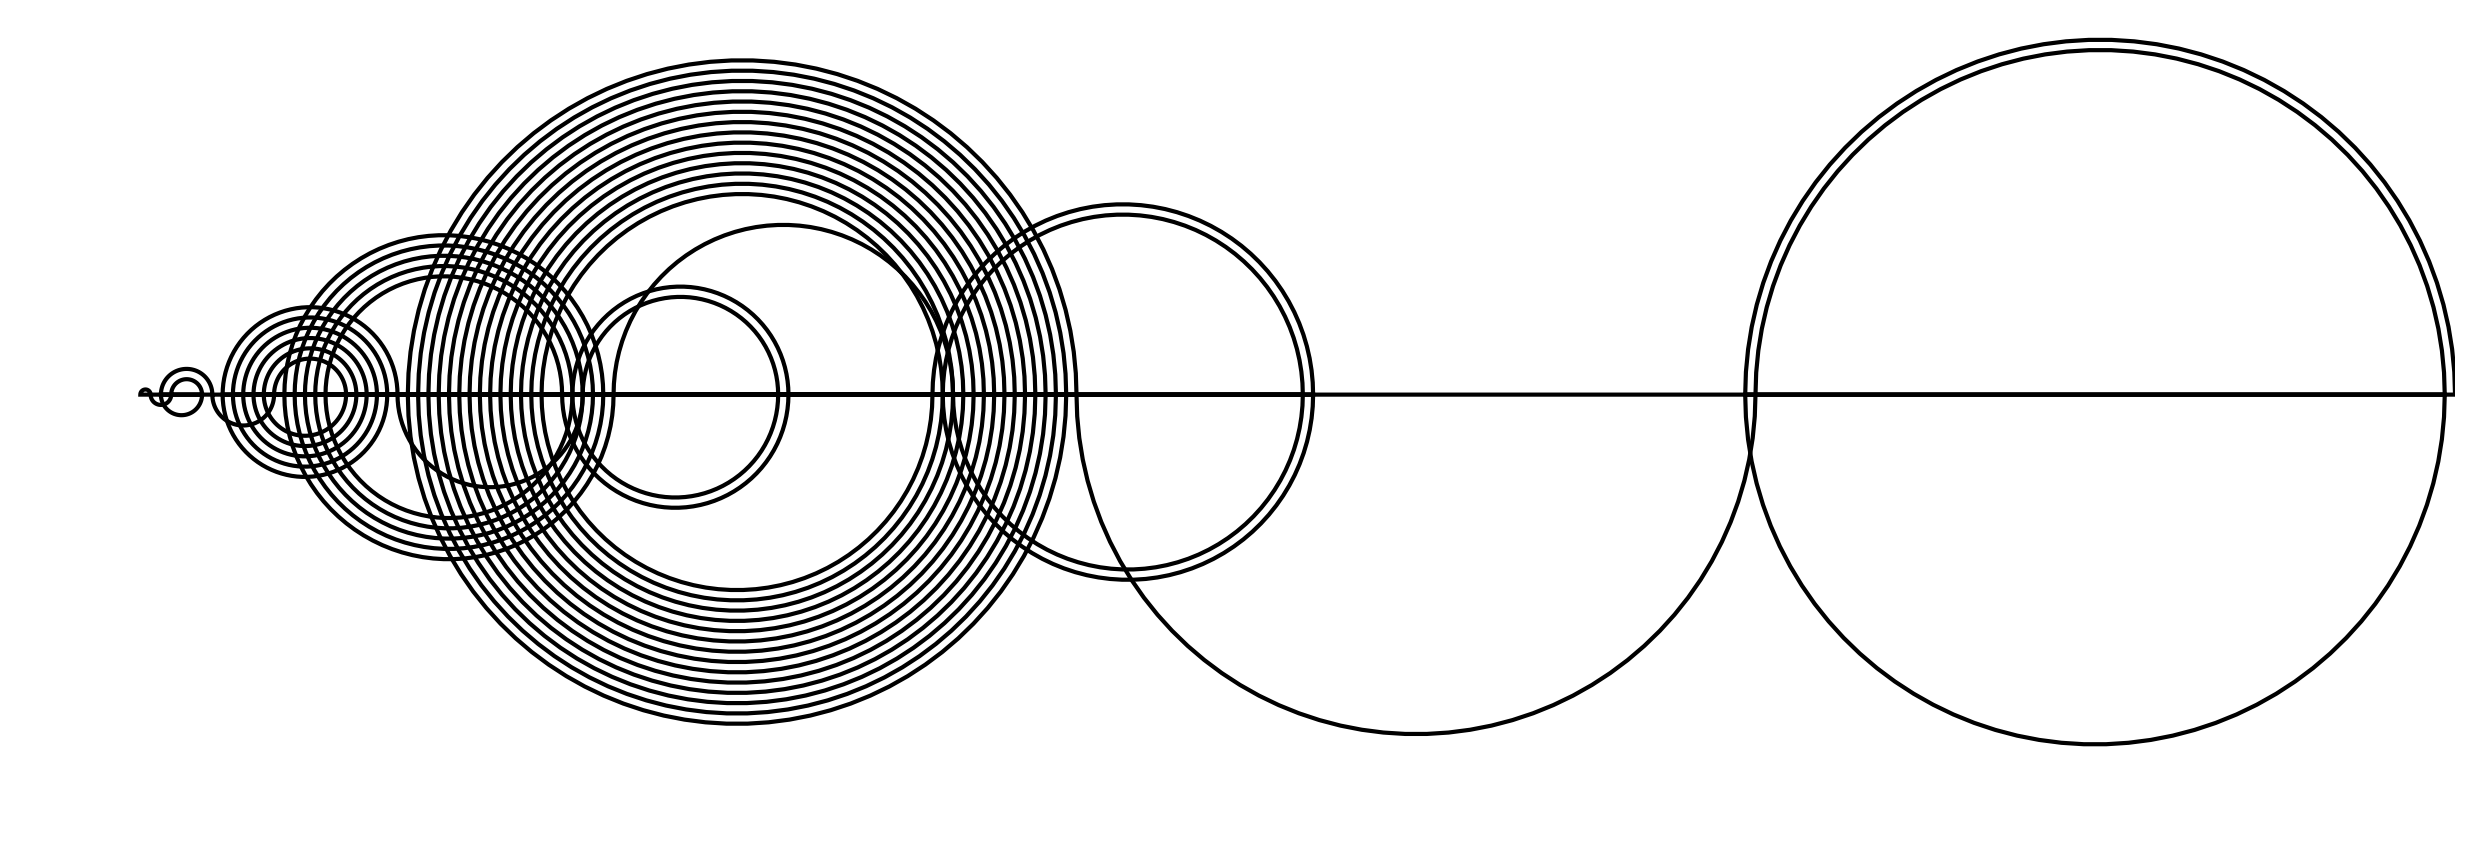

In [10]:
draw_recaman(70, dpi=300)